<a href="https://colab.research.google.com/github/prathmeshpatil98/Machine_learning/blob/main/EDA_Student_perform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## problem statement:-

## EDA Project

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [8]:
df = pd.read_csv('student_data.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
df.shape

(1000, 8)

## Data checks to perform
1.  check missing value
2. check duplicates
3. check data types
4. check the number of unique values of each column
5. check stastatics of data set
6. check various categories present in the different categorical columns





In [10]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [11]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [15]:
#check the number of unique values of each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [16]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [17]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

## insight and observation -
* From the above description of numerical data,all means are very close to each other- between 66 and 69
* All the standard deviation are also close- between 14.6- 15.19
* While there is a minimum of 0 for maths,other are having 17 and 10 value

In [18]:
[feature for feature in df.columns if df[feature].dtype == 'int']

['math_score', 'reading_score', 'writing_score']

In [19]:
numerical_feature =[feature for feature in df.columns if df[feature].dtype == 'int64']
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

In [20]:
numerical_feature

['math_score', 'reading_score', 'writing_score']

In [21]:
categorical_feature

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [22]:
df['total_score'] = (df['math_score']+df['reading_score']+df['writing_score'])
df['average']= df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<Axes: xlabel='average', ylabel='Count'>

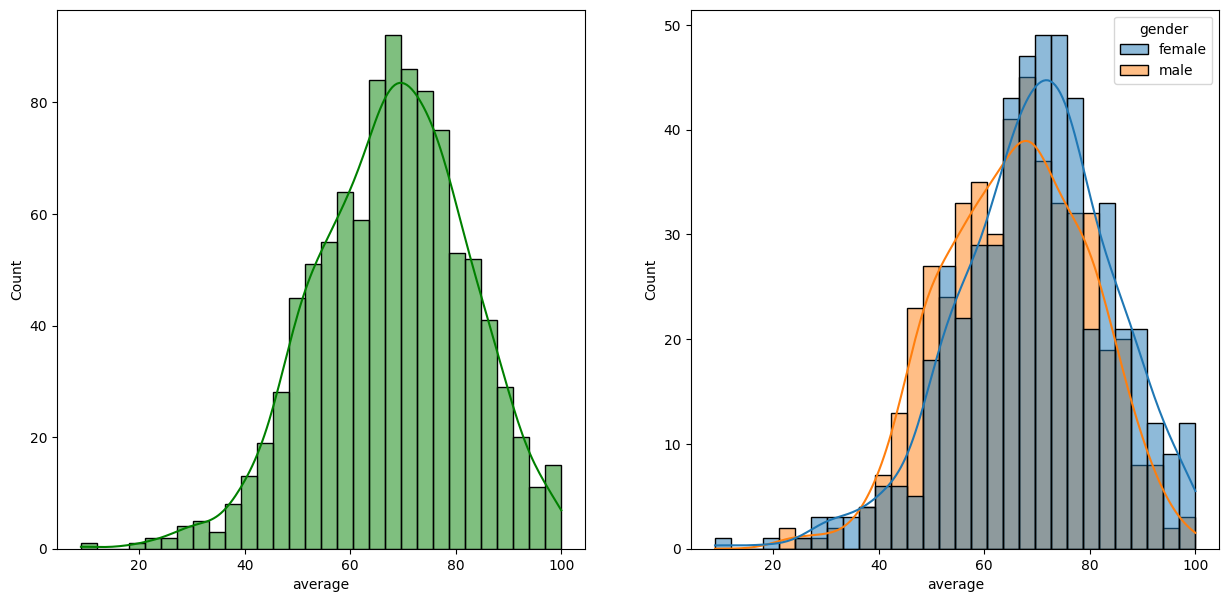

In [35]:
fig,axis = plt.subplots(1,2,figsize = (15 ,7))
plt.subplot(121)
sns.histplot(data = df , x ='average',bins =30 ,kde = True , color = 'g')
plt.subplot(122)
sns.histplot(data = df , x ='average',bins =30 ,kde = True ,hue = 'gender')

<Axes: xlabel='average', ylabel='Count'>

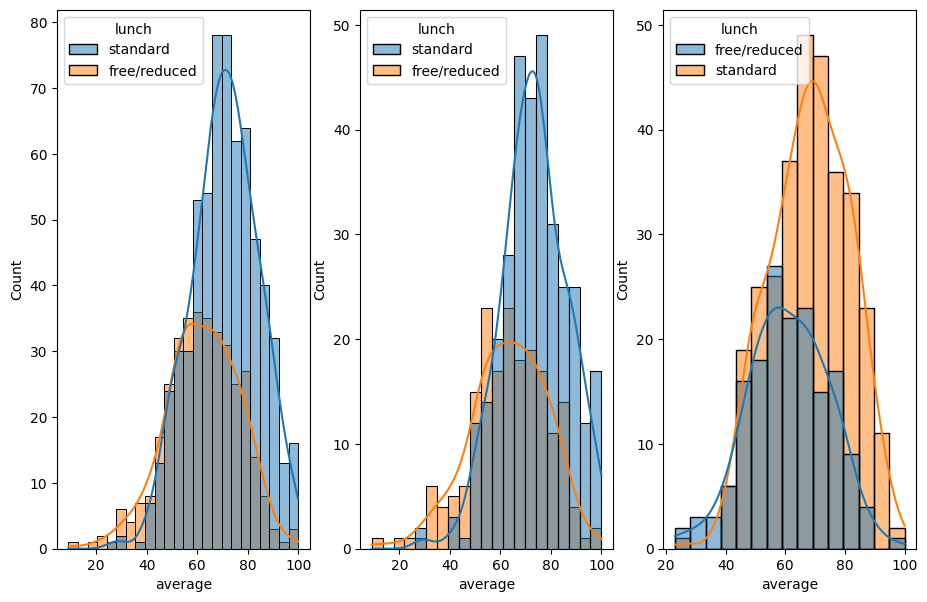

In [41]:
plt.subplots(1,3,figsize=(15,7))
plt.subplot(141)
sns.histplot(data=df, x='average',kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average',kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average',kde=True, hue='lunch')

## Insights

1.  In general parent's education don't help student perform well in exam.
2.  3rd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform
3.  2nd plot we can see there is no effect of parent's education on female students.

<Axes: xlabel='average', ylabel='Count'>

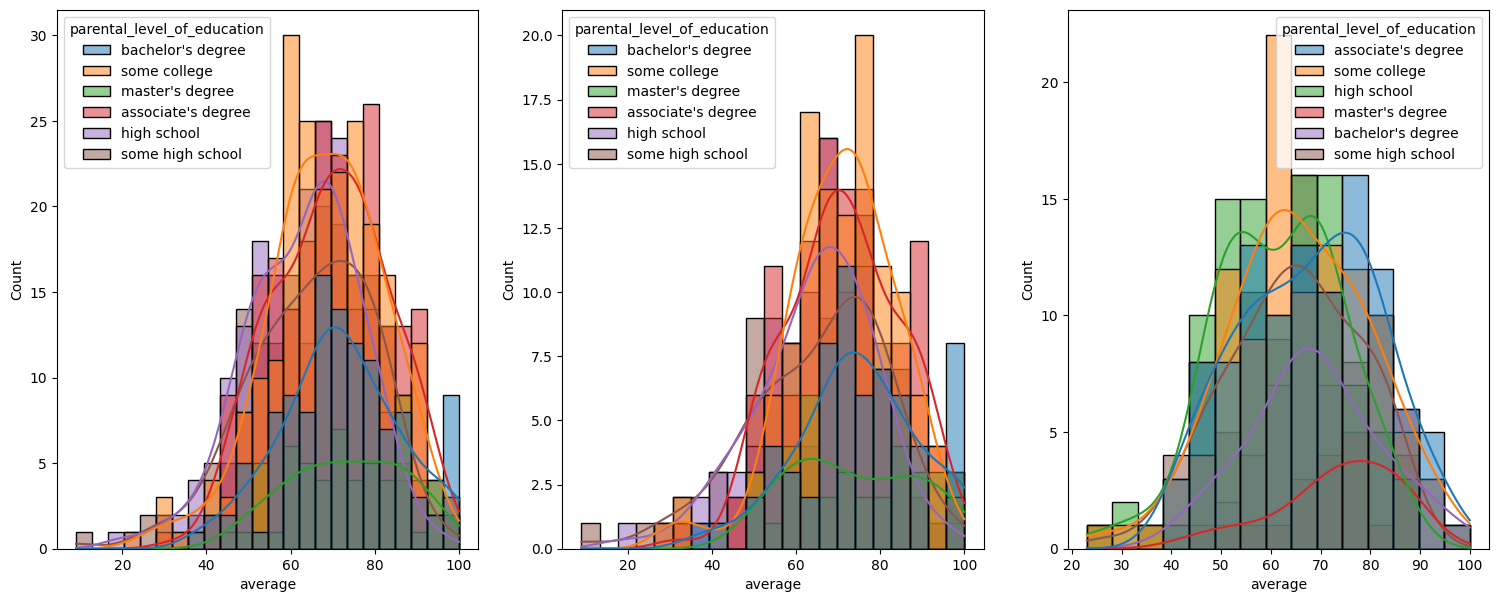

In [45]:
plt.subplots(1,3,figsize=(25,7))
plt.subplot(141)
sns.histplot(data=df, x='average',kde=True, hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average',kde=True, hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average',kde=True, hue='parental_level_of_education')

## Insights

  * Students of group A and group B tends,to perform poorly in exam.
  * Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female